In [95]:
# Importations

import numpy as np # Pour les calculs mathématiques
import matplotlib.pyplot as plt # Pour les graphiques
import pandas as pd # Pour la manipulation de tableaux de données
from spellchecker import SpellChecker # Pour vérifier que le dataset d'entraînement ne contient pas de fautes d'orthographe ni de noms propres
import time # Pour mesurer le temps d'exécution

In [96]:
#file_path = '/Users/quentingirard/Desktop/Ecole/2A_Ponts/S4/PRAMA/europarl-v6.fr-en.fr_toy'     #Chemin de la BDD jouet pour Quentin
file_path = '/Users/quentingirard/Desktop/Ecole/2A_Ponts/S4/PRAMA/europarl-v6.fr-en.fr_real'     #Chemin de la BDD complète pour Quentin

In [114]:
def remove_accents(text):
    text = text.replace('à', 'a')
    text = text.replace('â', 'a')
    text = text.replace('é', 'e')
    text = text.replace('è', 'e')
    text = text.replace('ê', 'e')
    text = text.replace('î', 'i')
    text = text.replace('ô', 'o')
    text = text.replace('ù', 'u')
    text = text.replace('û', 'u')
    text = text.replace('ç', 'c')
    text = text.replace('À', 'A')
    text = text.replace('Â', 'A')
    text = text.replace('É', 'E')
    text = text.replace('È', 'E')
    text = text.replace('Ê', 'E')
    text = text.replace('Î', 'I')
    text = text.replace('Ô', 'O')
    text = text.replace('Ù', 'U')
    text = text.replace('Û', 'U')
    text = text.replace('Ç', 'C')
    return text

def remove_special_chars(text):
    text = text.replace('.', '')
    text = text.replace('!', ' ')
    text = text.replace('?', ' ')
    text = text.replace("' ", ' ')
    text = text.replace("'", ' ')
    text = text.replace('"', ' ')
    text = text.replace(',', '')
    text = text.replace(';', ' ')
    text = text.replace('(', '')
    text = text.replace(')','')
    text = text.replace(': ', ' ')
    text = text.replace(':', ' ')
    text = text.replace('«', '')
    text = text.replace('»', '')
    text = text.replace('-', '')
    text = text.replace('-', '')
    text = text.replace('–', '')
    text = text.replace('’', ' ')
    return text

def remove_double_spaces(text):
    text = text.replace('  ', ' ')
    text = text.replace('   ', ' ')
    return text

def remove_numbers(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

In [115]:
def text_preparation(file_path, number_char, verbose=False):
    # Ouverture du fichier
    number_char = min(number_char, 304390477) 
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read(number_char)

    # Suppression des caractères inintéressants
    text = text.lower() # On met tout en minuscule - abandonné car on a besoin des majuscules pour identifier les noms propres.
    #text = remove_accents(text) # On enlève les accents
    text = remove_special_chars(text) # On remplace les caractères spéciaux par des espaces
    text = remove_numbers(text) # On enlève les chiffres

    ## Vérification de la bonne orthographe des mots

    spell = SpellChecker(language='fr')
    words = text.split()
    misspelled = spell.unknown(words)
    list_misspelled = [word for word in misspelled if len(word) > 1]
    print(list_misspelled) if verbose else None

    percentage_misspelled = round(len(list_misspelled) / len(words) * 100,2)
    print(f"Percentage of misspelled words: {percentage_misspelled:.2f}%") if verbose else None

    # On supprime les mots mal orthographiés et les noms propres - LIMITANTE TEMPORELLEMENT
    time_start = time.time()

    print(f'Nouvelle longueur du texte: {len(text.split())} mots') if verbose else None
    for word in words:
        if word in list_misspelled:
            text = text.replace(word, '')

    time_end = time.time()
    execution_time = round(time_end - time_start,2)
    print(f'Temps d\'exécution: {execution_time} s') if verbose else None

    text = remove_double_spaces(text) # On enlève les doubles espaces dus à la suppression des mots et des caractères spéciaux

    return text,execution_time

## Choix du nombre de caractères du texte constituant la BDD

In [107]:
execution_times = {}

for number_chars in [k * 100000 for k in range(1, 21)]:
    text, elapsed_time = text_preparation(file_path, number_chars)
    execution_times[number_chars] = elapsed_time
    print(f'Nombre de caractères: {number_chars} - Temps d\'exécution: {elapsed_time} s')

for number_chars in [k * 100000 for k in range(20, 42,3)]:
    text, elapsed_time = text_preparation(file_path, number_chars)
    execution_times[number_chars] = elapsed_time
    print(f'Nombre de caractères: {number_chars} - Temps d\'exécution: {elapsed_time} s')

for number_chars in [k * 100000 for k in range(45, 60,5)]:
    text, elapsed_time = text_preparation(file_path, number_chars)
    execution_times[number_chars] = elapsed_time
    print(f'Nombre de caractères: {number_chars} - Temps d\'exécution: {elapsed_time} s')

Nombre de caractères: 100000 - Temps d'exécution: 0.05 s
Nombre de caractères: 200000 - Temps d'exécution: 0.17 s
Nombre de caractères: 300000 - Temps d'exécution: 0.36 s
Nombre de caractères: 400000 - Temps d'exécution: 0.68 s
Nombre de caractères: 500000 - Temps d'exécution: 1.05 s
Nombre de caractères: 600000 - Temps d'exécution: 1.44 s
Nombre de caractères: 700000 - Temps d'exécution: 1.98 s
Nombre de caractères: 800000 - Temps d'exécution: 2.65 s
Nombre de caractères: 900000 - Temps d'exécution: 3.36 s
Nombre de caractères: 1000000 - Temps d'exécution: 4.1 s
Nombre de caractères: 1100000 - Temps d'exécution: 4.92 s
Nombre de caractères: 1200000 - Temps d'exécution: 5.72 s
Nombre de caractères: 1300000 - Temps d'exécution: 6.72 s
Nombre de caractères: 1400000 - Temps d'exécution: 7.7 s
Nombre de caractères: 1500000 - Temps d'exécution: 8.8 s
Nombre de caractères: 1600000 - Temps d'exécution: 9.82 s
Nombre de caractères: 1700000 - Temps d'exécution: 11.05 s
Nombre de caractères: 180

KeyboardInterrupt: 

In [108]:
for number_chars in [k * 100000 for k in range(45, 60,5)]:
    text, elapsed_time = text_preparation(file_path, number_chars)
    execution_times[number_chars] = elapsed_time
    print(f'Nombre de caractères: {number_chars} - Temps d\'exécution: {elapsed_time} s')

Nombre de caractères: 4500000 - Temps d'exécution: 67.29 s
Nombre de caractères: 5000000 - Temps d'exécution: 82.17 s


KeyboardInterrupt: 

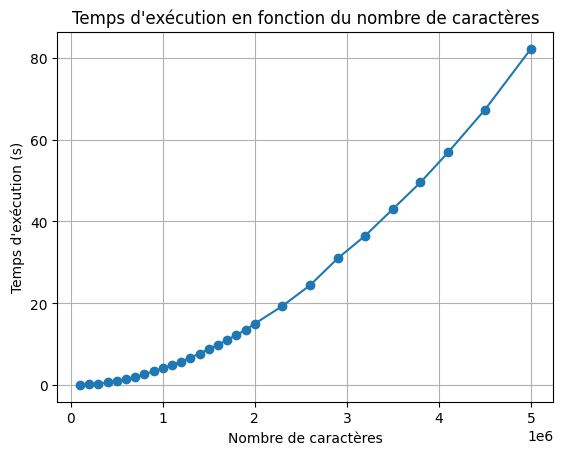

In [111]:
number_chars_list = list(execution_times.keys())
execution_time_list = list(execution_times.values())
plt.plot(number_chars_list, execution_time_list, marker='o')
plt.xlabel('Nombre de caractères')
plt.ylabel('Temps d\'exécution (s)')
plt.title('Temps d\'exécution en fonction du nombre de caractères')
plt.grid(True)

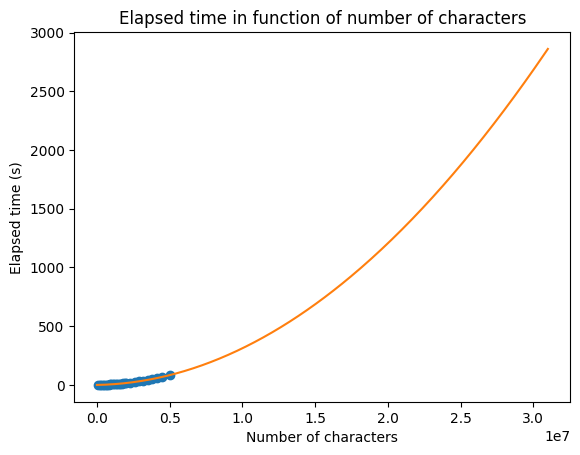

In [113]:
# Régression polynomiale de elapsed time en fonction de number_chars

# On crée un tableau de données
df = pd.DataFrame(list(execution_times.items()), columns=['number_chars', 'elapsed_time'])

# On crée un modèle de régression polynomiale
coefficients = np.polyfit(df['number_chars'], df['elapsed_time'], 2)
polynomial = np.poly1d(coefficients)

# On crée un vecteur de prédiction
x = np.linspace(0, 31000000, 310)
y = polynomial(x)

# On affiche le graphique superposant les données et la régression polynomiale
plt.plot(df['number_chars'], df['elapsed_time'], 'o')
plt.plot(x, y)
plt.xlabel('Number of characters')
plt.ylabel('Elapsed time (s)')
plt.title('Elapsed time in function of number of characters')
plt.show()

In [127]:
## Affichage du nombre de caractères pour un temps d'exécution donné grâce à la régression

wanted_time = 600

i = 0
while y[i] < wanted_time:
    i += 1
print(f'Pour un temps d\'exécution de {wanted_time} s, on peut traiter {int(x[i])} caractères')

Pour un temps d'exécution de 600 s, on peut traiter 14045307 caractères


## Nettoyage du texte et exportation

In [128]:
number_char_chosen = 8000000

text, elapsed_time = text_preparation(file_path, number_char_chosen)

# Exportation du texte

file_path_clean = f'/Users/quentingirard/Desktop/Ecole/2A_Ponts/S4/PRAMA/europarl-v6.fr-en.fr_clean_{number_char_chosen}'

with open(file_path_clean, 'w', encoding='utf-8') as file:
    file.write(text)

# Création du dataset d'entraînement à partir de la base de données

In [129]:
# Ouverture du document

with open(file_path_clean, 'r', encoding='utf-8') as file:
    text = file.read()
    words = text.split()

number_words = len(words)

# Initialisation d'un dictionnaire
word_counts = {}

# Comptage des occurences des mots et remplissage du dictionnaire
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Conversion du dictionnaire en DataFrame
df = pd.DataFrame(list(word_counts.items()), columns=['mot', 'occurence'])
df.set_index('mot', inplace=True)
df['fréquence (%)'] = df['occurence'] / number_words * 100

print(word_counts)
df.head()

{'rre': 423, 'de': 69540, 'la': 45160, 'seion': 148, 'je': 10410, 'dé': 348, 'du': 13726, 'parlement': 3272, 'opéen': 2020, 'qui': 12143, 'a': 9247, 'été': 2828, 'terp': 22, 'le': 33315, 'vre': 207, 'débre': 192, 'nier': 334, 'et': 30504, 'vous': 3122, 'uvle': 6, 'us': 3258, 'mes': 731, 'en': 19025, 'espérant': 9, 'q': 22568, 'az': 431, 'paé': 277, 'es': 1995, 'vaces': 19, 'pu': 685, 'ter': 331, 'grand': 482, 'b': 489, 'l': 36121, 'an': 1291, 'ne': 9221, 's': 23130, 'e': 24194, 'pas': 9337, 'anche': 57, 'les': 27327, 'd': 23154, 'un': 12657, 'cea': 344, 'nombre': 860, 'nos': 1466, 'ont': 3221, 'cs': 406, 'carophes': 85, 'tles': 310, 'vraiment': 327, 'terribles': 12, 'uhaé': 43, 'déb': 1036, 'à': 26327, 'ce': 17860, 'sujet': 727, 'ns': 13131, 'prochas': 48, 'au': 8846, 'péde': 316, 'nt': 6370, 'uhaera': 135, 'llègs': 797, 'me': 2504, 'demandé': 190, 'nous': 15194, 'obserons': 72, 'une': 13765, 'mute': 32, 'snce': 30, 'po': 12491, 'utes': 835, 'des': 26868, 'tempêtes': 32, 'ant': 1691, '

,occurence,fréquence (%)
mot,,
rre,423,0.033067
de,69540,5.436104
la,45160,3.530262
seion,148,0.011570
je,10410,0.813774


In [ ]:
# Exportation du DataFrame en fichier csv

df.to_csv(f'/Users/quentingirard/Desktop/Ecole/2A_Ponts/S4/PRAMA/europarl-v6.fr-en.fr_clean_{number_char_chosen}_frequency.csv')